## Name: Saloni Agrawal
## Usn: 18BTRCR003

# Comparing SVM Kernels performance using Breast Cancer Prediction Dataset.

# Objective- Breast Cancer Prediction using SVM.

_Breast cancer is a type of cancer that starts in the breast._ 
_Cancer starts when cells begin to grow out of control._
_Breast cancer cells usually form a tumor that can often be seen on an x-ray or felt as a lump._
__It’s important to understand that most breast lumps are benign(non cancerous) and malignant(cancerous).__
_It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area._
_Breast cancer is the most commonly occurring cancer in women and the second most common cancer overall._
_There were over 2 million new cases in 2018._

# Project Task:

__In this study, my task is to classify tumors into malignant (cancerous) or benign (non-cancerous) using features obtained from several cell images.
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.__

# About the dataset


__This dataset was obtained from kaggle (__ https://www.kaggle.com/merishnasuwal/breast-cancer-prediction-dataset __)__
_This breast cancer dataset was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg._


# Attribute Information:

_Diagnosis (M = malignant, B = benign)_

_Radius (mean of distances from center to points on the perimeter)_

_Texture (standard deviation of gray-scale values)_

_Perimeter_

_Area_

_Smoothness (local variation in radius lengths)_


# Importing Python Libraries.

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import string
import re
import nltk
import collections
from nltk.corpus import stopwords
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from empath import Empath
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle

Using TensorFlow backend.


# Read & Load Data

In [2]:
df = pd.read_csv("Breast_cancer_data.csv")
df.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


In [5]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

__Data dictionary__

_diagnosis: The diagnosis of breast tissues (1 = malignant, 0 = benign)_

In [13]:
df.shape

(569, 6)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [15]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [6]:
#checking for null values in the dataset
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

__Now, we will be looking at the distribution of classes( Malignant and Benign) in our dataset.__

In [7]:
count = df.diagnosis.value_counts()
count

1    357
0    212
Name: diagnosis, dtype: int64

__The distribution can be visualized as well by using a simple plot function of the matplotlib library.__

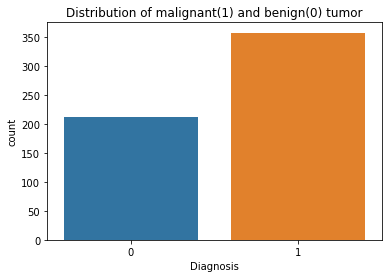

In [10]:
sns.countplot(x='diagnosis',data=df)
plt.title("Distribution of malignant(1) and benign(0) tumor")
plt.xlabel("Diagnosis")
plt.ylabel("count")
plt.show()

#### Target variable/ class

_The main motive of our predictor is to correctly predict on the basis of the data available, if the breast cancer is_

__Malignant(1) i.e. Harmful ,or
Benign(0) i.e. Not Harmful.__

_Hence, our target class is Diagnosis_

In [16]:
y_target = df['diagnosis']

## Feature Selection

__Let us now plot out the pairplot of different features to determine which features are better at classifying the 2 classes of our problem.__

In [17]:
df['target'] = df['diagnosis'].map({0:'B',1:'M'}) # converting the data into categorical

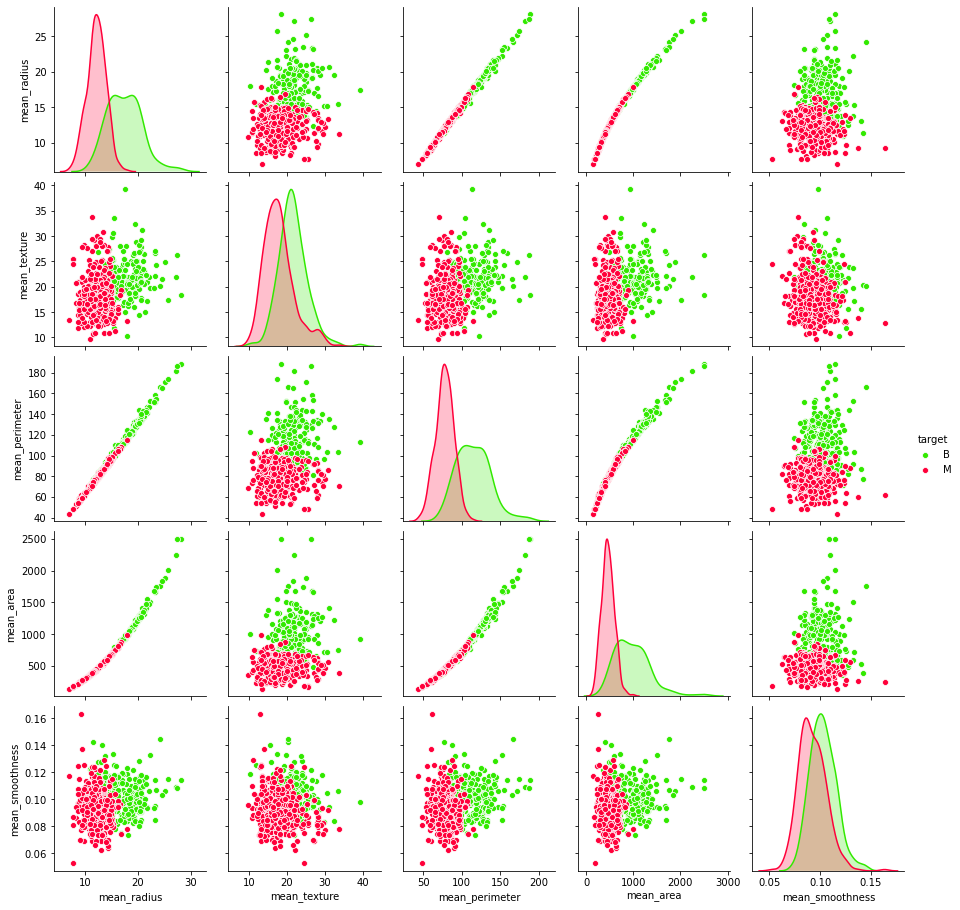

In [18]:
sns.pairplot(df.drop('diagnosis', axis = 1), hue="target", palette='prism');

_The features mean_perimeter and mean_texture seem to be most relevant_

## Let's check the correlation between our features

<AxesSubplot:>

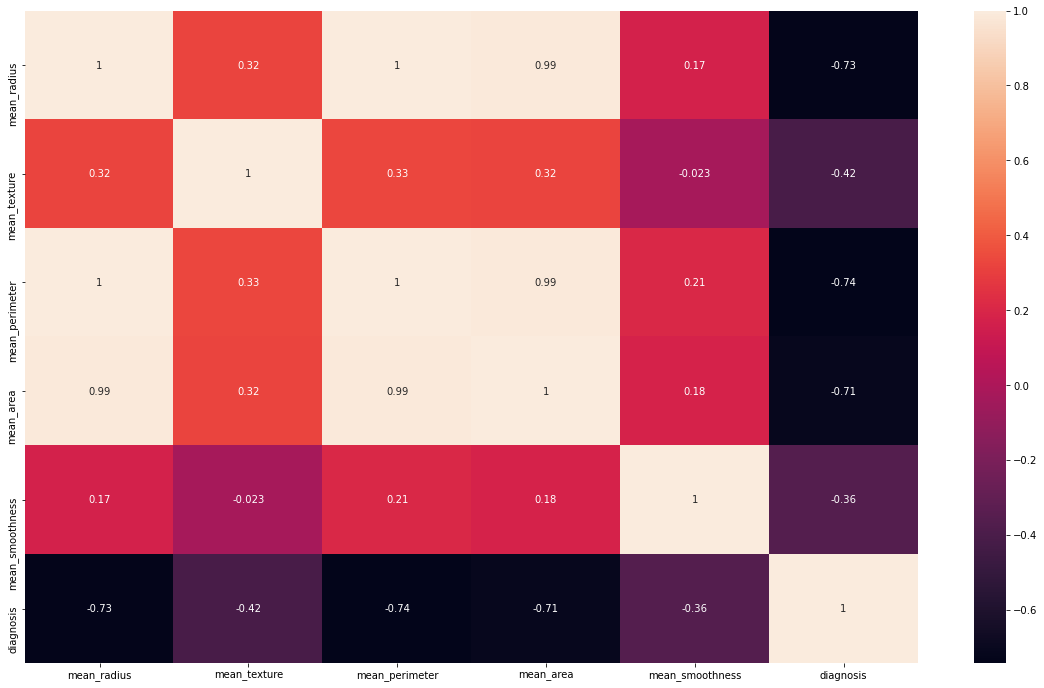

In [27]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot = True)

__There is a strong correlation between mean radius and mean perimeter, as well as mean area and mean perimeter__

<h1><center>Support Vector Machine </center></h1>

_A Support Vector Machine (SVM) is a binary linear classification whose decision boundary is explicitly constructed to minimize generalization error. It is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression and even outlier detection._

### Model Training
_From our dataset, let’s create the target and predictor matrix_

__“y” = Is the feature we are trying to predict (Output). In this case we are trying to predict if our “target” is cancerous (Malignant) or not (Benign). i.e. we are going to use the “target” feature here.__

__“X” = The predictors which are the remaining columns (mean radius, mean texture, mean perimeter, mean area, mean smoothness, etc.)__

In [86]:
df = df.drop('diagnosis', axis = 1)

In [87]:
# input column
X = df.drop('target', axis = 1)
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030


In [88]:
# target column
y = df['target']
y.head()

0    B
1    B
2    B
3    B
4    B
Name: target, dtype: object

## Scaling Data

In [89]:
#Scaling the Data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

## Splitting the data into Train and test

In [90]:
# Spliting the dataset into train-test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.30,test_size=0.25,random_state=41)

<h2><center>Building Support Vector Machine (SVM) Model </center></h2>

In [91]:
col_names = ['Kernel Name', 'Accuracy']
acc = pd.DataFrame(columns = col_names)

In [92]:
def valuation(name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy of "+ name + " is: "+ str(accuracy))
    acc.loc[len(acc.index)] = [name, accuracy]
    #Confusion Matrix
    print("\nConfusion Matrix:")
    cnf = metrics.confusion_matrix(y_true = y_test,y_pred = y_pred)
    return(cnf)
    

### Support Vector Classification using inbuilt Kernels
_SVM provides four inbuilt kernels for classification: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’ ('rbf' as default)_

<h1><center> 1) LINEAR KERNEL</center> </h1>

In [93]:
# Building a linear SVM model
svm_linear = SVC(kernel='linear',probability=True)
svm_linear.fit(X_train,y_train)
y_pred = svm_linear.predict(X_test)
valuation('svm_linear', y_test, y_pred)

Accuracy of svm_linear is: 0.972027972027972

Confusion Matrix:


array([[52,  1],
       [ 3, 87]], dtype=int64)

<h1><center> 2) RBF KERNEL </center></h1>

In [94]:
# Building a gaussian SVM model
svm_gaussian = SVC(kernel='rbf',probability=True)
svm_gaussian.fit(X_train,y_train)
y_pred = svm_gaussian.predict(X_test)
valuation('svm_gaussian', y_test, y_pred)

Accuracy of svm_gaussian is: 0.972027972027972

Confusion Matrix:


array([[53,  0],
       [ 4, 86]], dtype=int64)

<h1><center> 3) PLOYNOMIAL KERNEL </center></h1>

In [95]:
# Building a Polynomial SVM model
svm_poly = SVC(kernel='poly',probability=True)
svm_poly.fit(X_train,y_train)
y_pred = svm_poly.predict(X_test)
valuation('svm_poly', y_test, y_pred)

Accuracy of svm_poly is: 0.8881118881118881

Confusion Matrix:


array([[38, 15],
       [ 1, 89]], dtype=int64)

<h1> <center> 4)SIGMOID KERNEL</center></h1>

In [96]:
# Building a Sigmoid SVM model
svm_sigmoid = SVC(kernel='sigmoid',probability=True)
svm_sigmoid.fit(X_train,y_train)
y_pred = svm_sigmoid.predict(X_test)
valuation('svm_sigmoid', y_test, y_pred)

Accuracy of svm_sigmoid is: 0.9370629370629371

Confusion Matrix:


array([[48,  5],
       [ 4, 86]], dtype=int64)

### SVC using PyKernels

_PyKernels is a python library for working with kernel methods in machine learning. It provides
implementations of various kernel functions ranging from typical linear, polynomial or rbf ones through
wawelet, fourier transformations, kernels for binary sequences and even kernels for labeled graphs._

__Below we will go through some of the other SVM kernels.__

<h1> <center> 5) COSSIM KERNEL</center></h1>

In [97]:
# Building a cossim SVM model
from pykernels.regular import Cossim
svm_cos = SVC(kernel = Cossim(),probability=True)
svm_cos.fit(X_train,y_train)
y_pred = svm_cos.predict(X_test)
valuation('svm_cos', y_test, y_pred)

Accuracy of svm_cos is: 0.972027972027972

Confusion Matrix:


array([[52,  1],
       [ 3, 87]], dtype=int64)

<h1><center> 6) Inverse Multiquadratic Kernel</center></h1>

In [98]:
# Building a InverseMultiquadratic SVM model
from pykernels.regular import InverseMultiquadratic
svm_mul = SVC(kernel = InverseMultiquadratic(),probability=True)
svm_mul.fit(X_train,y_train)
y_pred = svm_mul.predict(X_test)
valuation('svm_mul', y_test, y_pred)

Accuracy of svm_mul is: 0.965034965034965

Confusion Matrix:


array([[52,  1],
       [ 4, 86]], dtype=int64)

<h1><center> 7) Laplacian Kernel</center></h1>

In [99]:
# Building a Laplacian SVM model
from pykernels.regular import Laplacian
svm_lap = SVC(kernel = Laplacian(),probability=True)
svm_lap.fit(X_train,y_train)
y_pred = svm_lap.predict(X_test)
valuation('svm_lap', y_test, y_pred)

Accuracy of svm_lap is: 0.972027972027972

Confusion Matrix:


array([[52,  1],
       [ 3, 87]], dtype=int64)

<h1><center> 8) Log Kernel</center></h1>

In [100]:
# Building a Log SVM model
from pykernels.regular import Log
svm_log= SVC(kernel = Log(),probability=True)
svm_log.fit(X_train,y_train)
y_pred = svm_log.predict(X_test)
valuation('svm_log', y_test, y_pred)

Accuracy of svm_log is: 0.965034965034965

Confusion Matrix:


array([[52,  1],
       [ 4, 86]], dtype=int64)

<h1><center> 9) TStudent Kernel</center></h1>

In [101]:
# Building a TStudent SVM model
from pykernels.regular import TStudent
svm_tst = SVC(kernel = TStudent(),probability=True)
svm_tst.fit(X_train,y_train)
y_pred = svm_tst.predict(X_test)
valuation('svm_tst', y_test,y_pred)

Accuracy of svm_tst is: 0.958041958041958

Confusion Matrix:


array([[52,  1],
       [ 5, 85]], dtype=int64)

<h1><center> 10) ANOVA Kernel </center></h1>

In [102]:
# Building a ANOVA SVM model
from pykernels.regular import ANOVA
svm_anova = SVC(kernel = ANOVA(),probability=True)
svm_anova.fit(X_train,y_train)
y_pred = svm_anova.predict(X_test)
valuation('svm_anova', y_test,y_pred)

Accuracy of svm_anova is: 0.951048951048951

Confusion Matrix:


array([[51,  2],
       [ 5, 85]], dtype=int64)

### Let's compare all the accuracies of the kernels used.

In [103]:
print('Accuracy of all the Kernels used are given below:')
acc

Accuracy of all the Kernels used are given below:


,Kernel Name,Accuracy
0,svm_linear,0.972028
1,svm_gaussian,0.972028
2,svm_poly,0.888112
3,svm_sigmoid,0.937063
4,svm_cos,0.972028
5,svm_mul,0.965035
6,svm_lap,0.972028
7,svm_log,0.965035
8,svm_tst,0.958042
9,svm_anova,0.951049


In [104]:
acc = acc.sort_values('Accuracy', ascending = False)
acc

,Kernel Name,Accuracy
0,svm_linear,0.972028
1,svm_gaussian,0.972028
4,svm_cos,0.972028
6,svm_lap,0.972028
5,svm_mul,0.965035
7,svm_log,0.965035
8,svm_tst,0.958042
9,svm_anova,0.951049
3,svm_sigmoid,0.937063
2,svm_poly,0.888112


__Maximum Accuracy__

In [105]:
acc.iloc[:1]

,Kernel Name,Accuracy
0,svm_linear,0.972028


__Minimum Accuracy__

In [107]:
acc.iloc[-1:]

,Kernel Name,Accuracy
2,svm_poly,0.888112


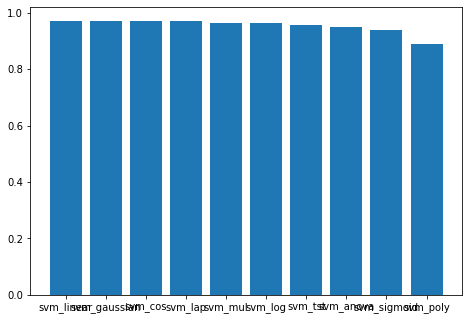

In [110]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(acc['Kernel Name'], acc['Accuracy'])
plt.show()

_Hence we can conclude that_ __SVM Linear Kernel, SVM Gaussian Kernel, SVM Cossim Kernel and SVM Laplacian Kernel__ _are the most accurate kernels from all the kernels used in our dataset._

### Normalising our training data

In [111]:
X_train_min = X_train.min()
X_train_min

-3.1120847879199807

In [113]:
X_train_max = X_train.max()
X_train_max

4.651888980771197

In [114]:
X_train_range=X_train_max- X_train_min
X_train_range

7.763973768691178

In [117]:
X_train_scaled = (X_train - X_train_min)/(X_train_range)
X_train_scaled

array([[0.62225092, 0.40834028, 0.62276237, 0.6188379 , 0.55610793],
       [0.37642637, 0.38466191, 0.37680872, 0.36281652, 0.50294449],
       [0.30838564, 0.5567048 , 0.30672572, 0.31376621, 0.2026627 ],
       [0.41776294, 0.50245434, 0.42429114, 0.40164649, 0.29423215],
       [0.33545561, 0.62773994, 0.34343839, 0.3358187 , 0.46536343],
       [0.3563068 , 0.31212814, 0.3507597 , 0.3501052 , 0.24546844],
       [0.35081965, 0.38735944, 0.3472582 , 0.34285205, 0.40450046],
       [0.72870174, 0.41703235, 0.71984933, 0.77708835, 0.37388565],
       [0.58493827, 0.61994705, 0.5824421 , 0.57781001, 0.45253088],
       [0.33545561, 0.19043927, 0.33171368, 0.33255845, 0.34281253],
       [0.27180461, 0.39065643, 0.28046449, 0.28783072, 0.40560039],
       [0.29741133, 0.36787723, 0.30513413, 0.3035825 , 0.39680093],
       [0.20123979, 0.2557796 , 0.20162775, 0.24416531, 0.35518678],
       [0.37313408, 0.3139265 , 0.36969962, 0.36369569, 0.16975637],
       [0.41447065, 0.14907704, 0.

In [118]:
X_test_min = X_test.min()
X_test_range = (X_test- X_test_min).max()
X_test_scaled = (X_test- X_test_min)/ X_test_range

_Now, let’s train our SVM model with our scaled (Normalized) datasets._


In [119]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

__Let's predict using scaled dataset__

In [121]:
y_predict = svc_model.predict(X_test_scaled)

In [128]:
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test,y_predict, labels=['M','B']))
confusion= pd.DataFrame(cm, index=['has_cancer', 'is_healthy'], columns = ['predicted_cancer', 'predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
has_cancer,90,0
is_healthy,26,27


<AxesSubplot:>

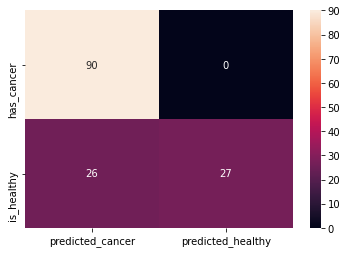

In [127]:
sns.heatmap(confusion, annot = True)

In [129]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           B       1.00      0.51      0.67        53
           M       0.78      1.00      0.87        90

    accuracy                           0.82       143
   macro avg       0.89      0.75      0.77       143
weighted avg       0.86      0.82      0.80       143

